# Project 2 - Aimes Housing Data and Kaggle Challenge

### By Alex Lau

## Contents

- [Problem Statment](#Problem-Statement)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Import Packages and Data](#Import-Packages-and-Data)
    - [High-Level Checks](#High-Level-Checks)
    - [Investigating Target Variable](#Investigating-Target-Variable)
    - [Investigating Features](#Investigating-Features)
    - [Visualizing Top 5 Features by Correlation](#Visualizing-Top-5-Features-by-Correlation)
    - [Handling Outliers](#Handling-Outliers)
- [Data Cleaning](#Data-Cleaning)
    - [Converting Ordinal Features to Numbers](#Converting-Ordinal-Features-to-Numbers)
    - [Inputting Missing Values: Nominal](#Inputting-Missing-Values:-Nominal)
    - [Inputting Missing Values: Continuous](#Inputting-Missing-Values:-Continuous)
    - [Inputting Missing Values: Discrete](#Inputting-Missing-Values:-Discrete)
- [Feature Engineering](#Feature-Engineering)
    - [Dummy Variable Creation](#Dummy-Variable-Creation)
    - [Interaction Variable Creation](#Interaction-Variable-Creation)
    - [Ensuring Consistent Columns for Both Dataframes](#Ensuring-Consistent-Columns-for-Both-Dataframes)
    - [Reviewing Correlations](#Reviewing-Correlations)
- [Preprocessing](#Preprocessing)
- [Modeling](#Modeling)
    - [Linear Regression](#Linear-Regression)
    - [Ridge Regression](#Ridge-Regression)
    - [LASSO Regression](#LASSO-Regression)
    - [Elastic Net Regression](#Elastic-Net-Regression)
- [Conclusions and Evaluation](#Conclusions-and-Evaluation)

## Problem Statement

Each year hundreds of households in Ames, Iowa purchase and sell homes that range in price from as low as 13,000 USD to over 600,000 USD. With so many variations depending on vast amounts of features, how can people ensure their homes are appropriately priced? We attemp to build a model to predict housing prices using Elastic Net Regression to analyze 78 features for over 2,000 homes sold between 2006 and 2010. Our goal is to identify key housing features that would influence the sale price by striving for a 90% prediction accuracy rate. This tool will help buyers and sellers come to a fair price.

## Exploratory Data Analysis

### Import Packages and Data

In [1]:
# importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, ElasticNetCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.datasets import make_classification

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# reading the files into dataframes
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
# replacing indices in the training and testing dataframes with ID column
df_train.set_index('Id', inplace = True)
df_test.set_index('Id', inplace = True)

### High-Level Checks

In [4]:
df_train.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                           
109  533352170           60        RL           NaN     13517   Pave   NaN   
544  531379050           60        RL          43.0     11492   Pave   NaN   
153  535304180           20        RL          68.0      7922   Pave   NaN   
318  916386060           60        RL          73.0      9802   Pave   NaN   
255  906425045           50        RL          82.0     14235   Pave   NaN   

    Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
Id                                    ...                                  
109       IR1          Lvl    AllPub  ...            0         0     NaN   
544       IR1          Lvl    AllPub  ...            0         0     NaN   
153       Reg          Lvl    AllPub  ...            0         0     NaN   
318       Reg          Lvl    AllPub  ...            0         0     NaN   
255       IR1          Lvl    AllPub  ...            0         0     NaN   

    Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                      
109   NaN          NaN        0       3     2010        WD      130500  
544   NaN          NaN        0       4     2009        WD      220000  
153   NaN          NaN        0       1     2010        WD      109000  
318   NaN          NaN        0       4     2010        WD      174000  
255   NaN          NaN        0       3     2010        WD      138500  

[5 rows x 80 columns]

In [5]:
df_test.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
2658  902301120          190        RM          69.0      9142   Pave  Grvl   
2718  905108090           90        RL           NaN      9662   Pave   NaN   
2414  528218130           60        RL          58.0     17104   Pave   NaN   
1989  902207150           30        RM          60.0      8520   Pave   NaN   
625   535105100           20        RL           NaN      9500   Pave   NaN   

     Lot Shape Land Contour Utilities  ... 3Ssn Porch Screen Porch Pool Area  \
Id                                     ...                                     
2658       Reg          Lvl    AllPub  ...          0            0         0   
2718       IR1          Lvl    AllPub  ...          0            0         0   
2414       IR1          Lvl    AllPub  ...          0            0         0   
1989       Reg          Lvl    AllPub  ...          0            0         0   
625        IR1          Lvl    AllPub  ...          0          185         0   

     Pool QC Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  
Id                                                                     
2658     NaN   NaN          NaN        0        4     2006        WD   
2718     NaN   NaN          NaN        0        8     2006        WD   
2414     NaN   NaN          NaN        0        9     2006        New  
1989     NaN   NaN          NaN        0        7     2007        WD   
625      NaN   NaN          NaN        0        7     2009        WD   

[5 rows x 79 columns]

In [6]:
df_train.isnull().sum().sort_values(ascending = False).head(10)

Pool QC          2042
Misc Feature     1986
Alley            1911
Fence            1651
Fireplace Qu     1000
Lot Frontage      330
Garage Qual       114
Garage Finish     114
Garage Cond       114
Garage Yr Blt     114
dtype: int64

In [7]:
df_test.isnull().sum().sort_values(ascending = False).head(10)

Pool QC          874
Misc Feature     837
Alley            820
Fence            706
Fireplace Qu     422
Lot Frontage     160
Garage Cond       45
Garage Qual       45
Garage Yr Blt     45
Garage Finish     45
dtype: int64

In [8]:
df_train.shape

(2051, 80)

In [9]:
df_test.shape

(878, 79)

In [10]:
df_train.describe()

PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.051000e+03  2051.000000   1721.000000    2051.000000   2051.000000   
mean   7.135900e+08    57.008776     69.055200   10065.208191      6.112140   
std    1.886918e+08    42.824223     23.260653    6742.488909      1.426271   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284581e+08    20.000000     58.000000    7500.000000      5.000000   
50%    5.354532e+08    50.000000     68.000000    9430.000000      6.000000   
75%    9.071801e+08    70.000000     80.000000   11513.500000      7.000000   
max    9.241520e+08   190.000000    313.000000  159000.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2051.000000  2051.000000     2051.000000   2029.000000   2050.000000   
mean       5.562165  1971.708922     1984.190151     99.695909    442.300488   
std        1.104497    30.177889       21.036250    174.963129    461.204124   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1953.500000     1964.500000      0.000000      0.000000   
50%        5.000000  1974.000000     1993.000000      0.000000    368.000000   
75%        6.000000  2001.000000     2004.000000    161.000000    733.750000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...     93.833740      47.556802       22.571916     2.591419   
std    ...    128.549416      66.747241       59.845110    25.229615   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     547.000000      432.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean      16.511458     2.397855     51.574354     6.219893  2007.775719   
std       57.374204    37.782570    573.393985     2.744736     1.312014   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      490.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 38 columns]

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 79 columns):
PID                878 non-null int64
MS SubClass        878 non-null int64
MS Zoning          878 non-null object
Lot Frontage       718 non-null float64
Lot Area           878 non-null int64
Street             878 non-null object
Alley              58 non-null object
Lot Shape          878 non-null object
Land Contour       878 non-null object
Utilities          878 non-null object
Lot Config         878 non-null object
Land Slope         878 non-null object
Neighborhood       878 non-null object
Condition 1        878 non-null object
Condition 2        878 non-null object
Bldg Type          878 non-null object
House Style        878 non-null object
Overall Qual       878 non-null int64
Overall Cond       878 non-null int64
Year Built         878 non-null int64
Year Remod/Add     878 non-null int64
Roof Style         878 non-null object
Roof Matl          878 non-null object
E

In [13]:
# Bsmt Full bath is a float in train, but an in test
df_train['Bsmt Full Bath'].dtype

dtype('float64')

In [14]:
# test bsmnt full bath data type
df_test['Bsmt Full Bath'].dtype

dtype('int64')

### Investigating Target Variable
Interestingly there are 2 homes selling for around $13,000

In [15]:
# checking lowest home prices, we will remove these as outliers
df_train['SalePrice'].sort_values(ascending = True)

Id
182      12789
1554     13100
727      34900
2844     35000
2881     35311
         ...  
2333    556581
434     582933
2451    584500
1638    591587
45      611657
Name: SalePrice, Length: 2051, dtype: int64

In [16]:
df_train['SalePrice'].mean()

181469.70160897123

In [17]:
df_train['SalePrice'].median()

162500.0

Sale Price is positively skewed

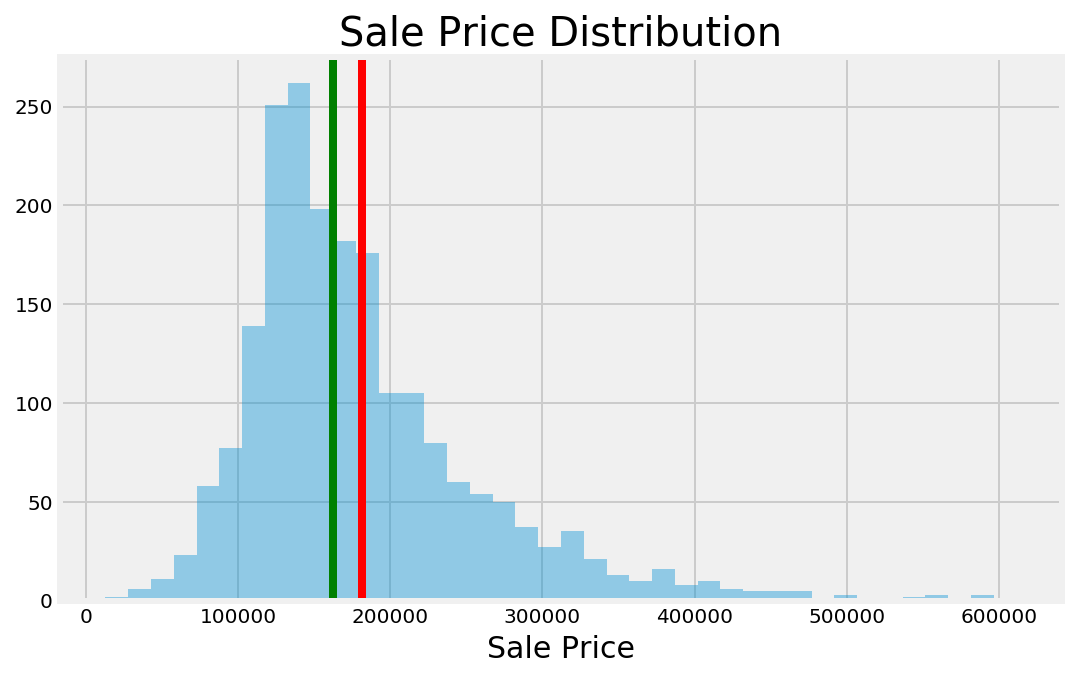

In [18]:
# normal histogram
plt.figure(figsize = (8, 5))
sns.distplot(df_train['SalePrice'], kde = False, bins = 40)
plt.axvline(df_train['SalePrice'].mean(), 0,250, color = 'red')
plt.axvline(df_train['SalePrice'].median(), 0,250, color = 'green')
plt.title('Sale Price Distribution', size = 20)
plt.xlabel('Sale Price', size = 15);

A logarithmic sale price yields a more normal distribution

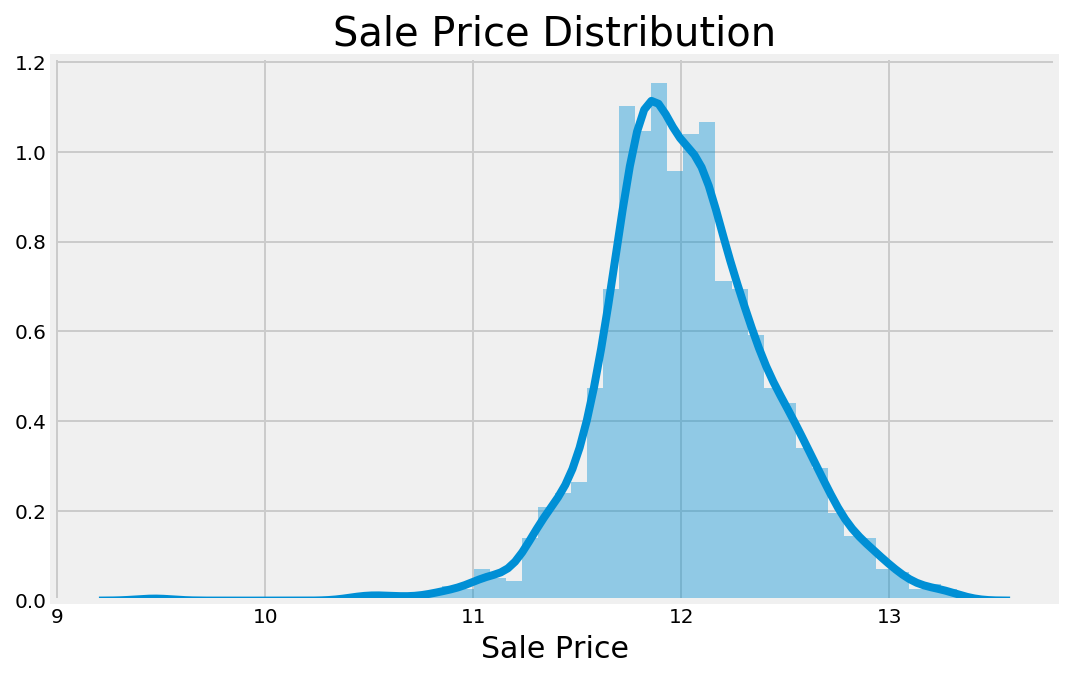

In [19]:
# logged histogram

plt.figure(figsize = (8, 5))
sns.distplot(np.log(df_train['SalePrice']), hist = True)
plt.title('Sale Price Distribution', size = 20)
plt.xlabel('Sale Price', size = 15);

### Investigating Features

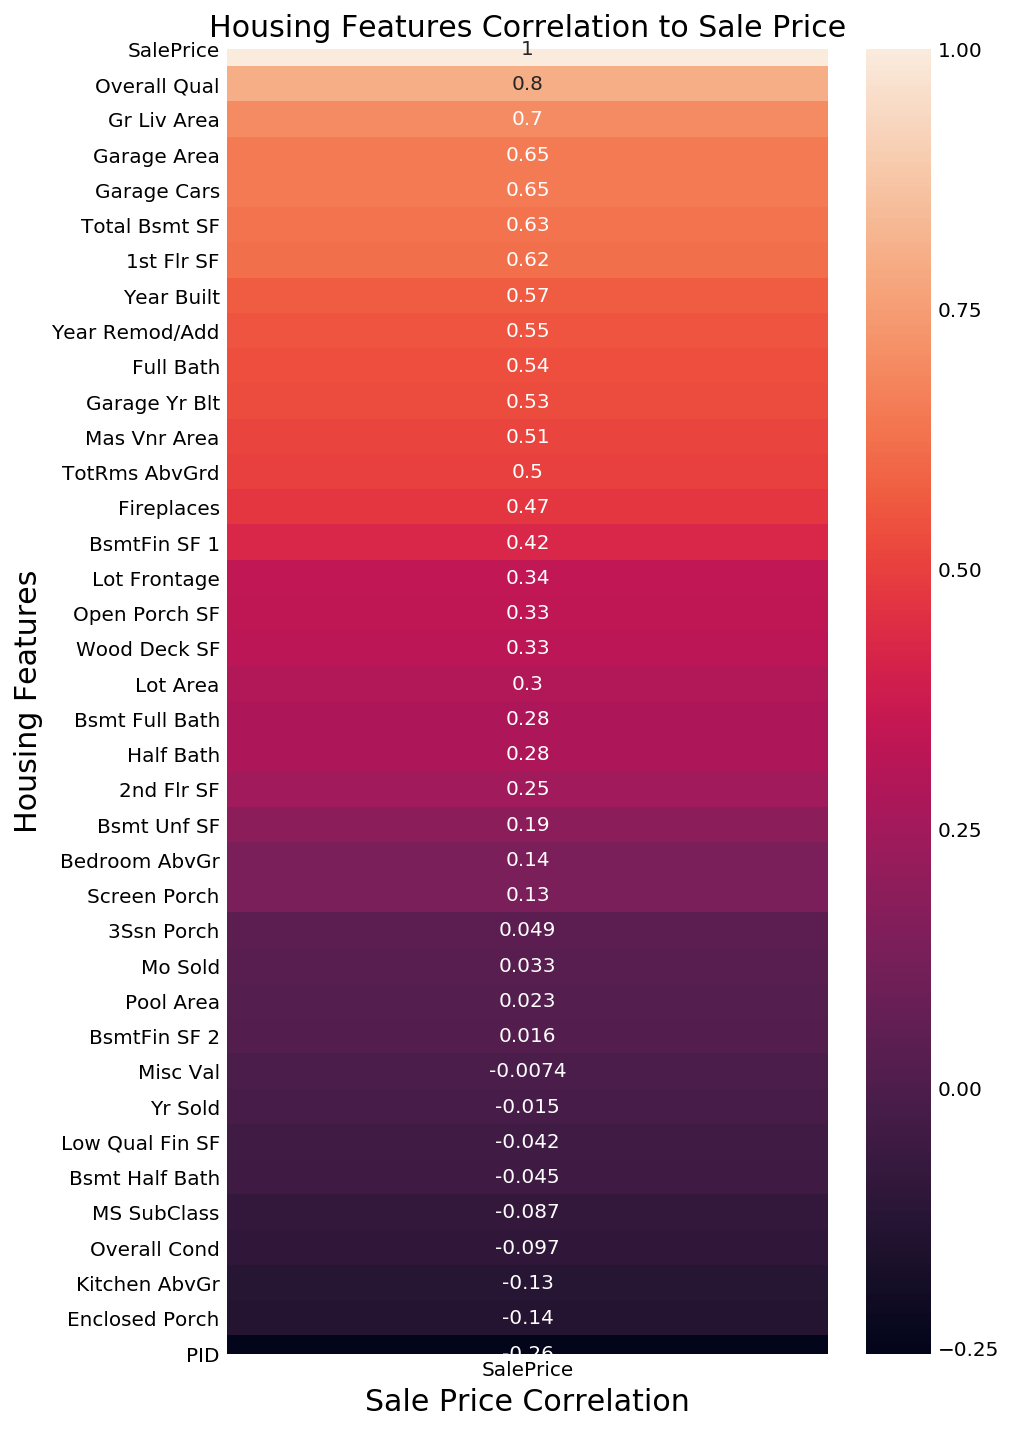

In [20]:
# Checking correlation all the features
plt.figure(figsize = (6,12))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), annot = True)
plt.title('Housing Features Correlation to Sale Price', fontsize = 15)
plt.xlabel('Sale Price Correlation', fontsize = 15)
plt.ylabel('Housing Features', fontsize = 15);

In [21]:
# sorting this by descending order
top_features = df_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)
top_features.drop(['SalePrice'],inplace = True)

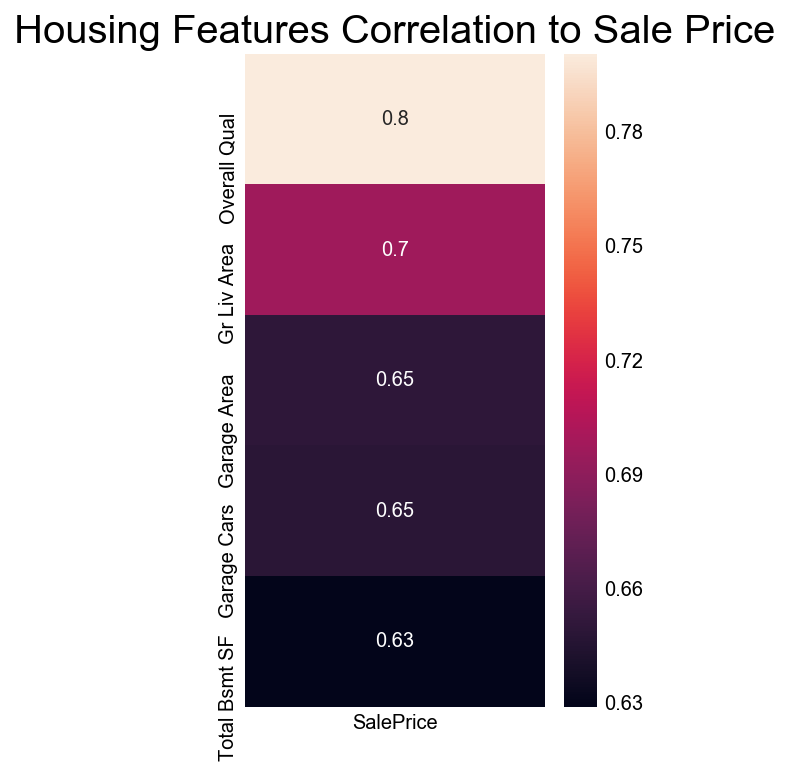

In [22]:
# Checking correlation all the features
plt.figure(figsize = (3,6))
sns.heatmap(top_features.head(), annot = True)
sns.set(font_scale=1.7)
plt.title('Housing Features Correlation to Sale Price', fontsize = 20)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t);

### Visualizing Top 5 Features by Correlation

#### 1. Overall Quality

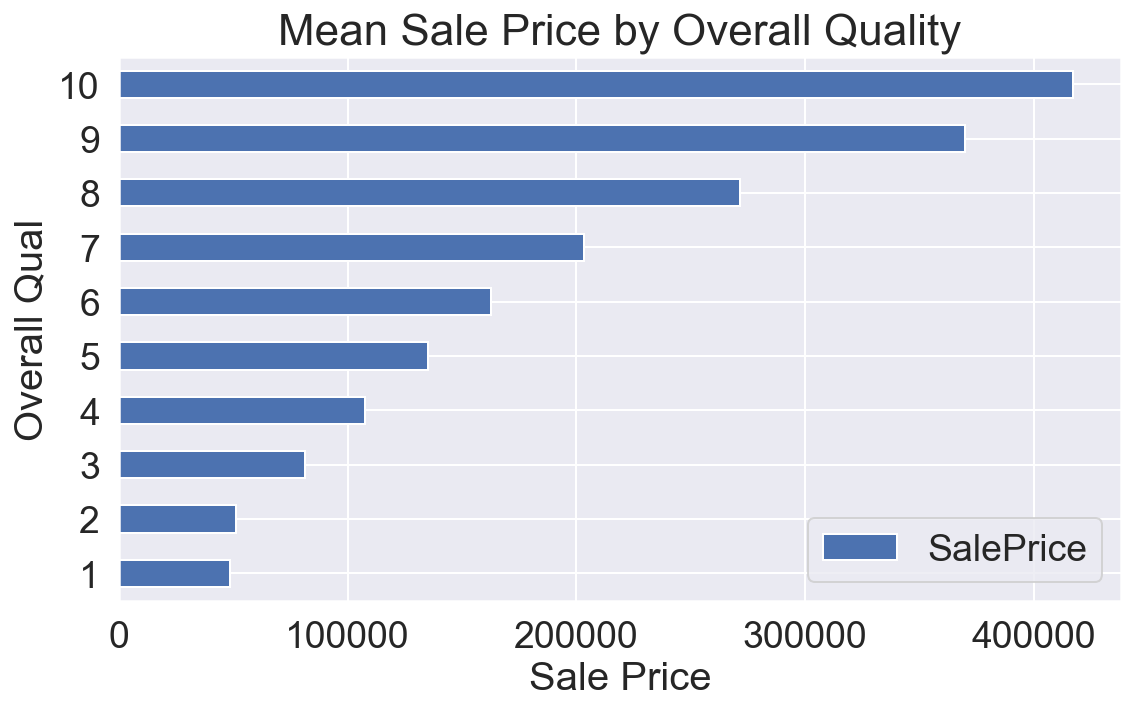

In [23]:
# Plotting mean sale prices per quality level
df_train.groupby(['Overall Qual'])[['SalePrice']].mean().plot(kind = 'barh', figsize = (8, 5))
plt.title('Mean Sale Price by Overall Quality', size = 22)
plt.ylabel('Overall Qual', size = 20)
plt.xlabel('Sale Price', size = 20);

#### 2. Above Ground Living Area

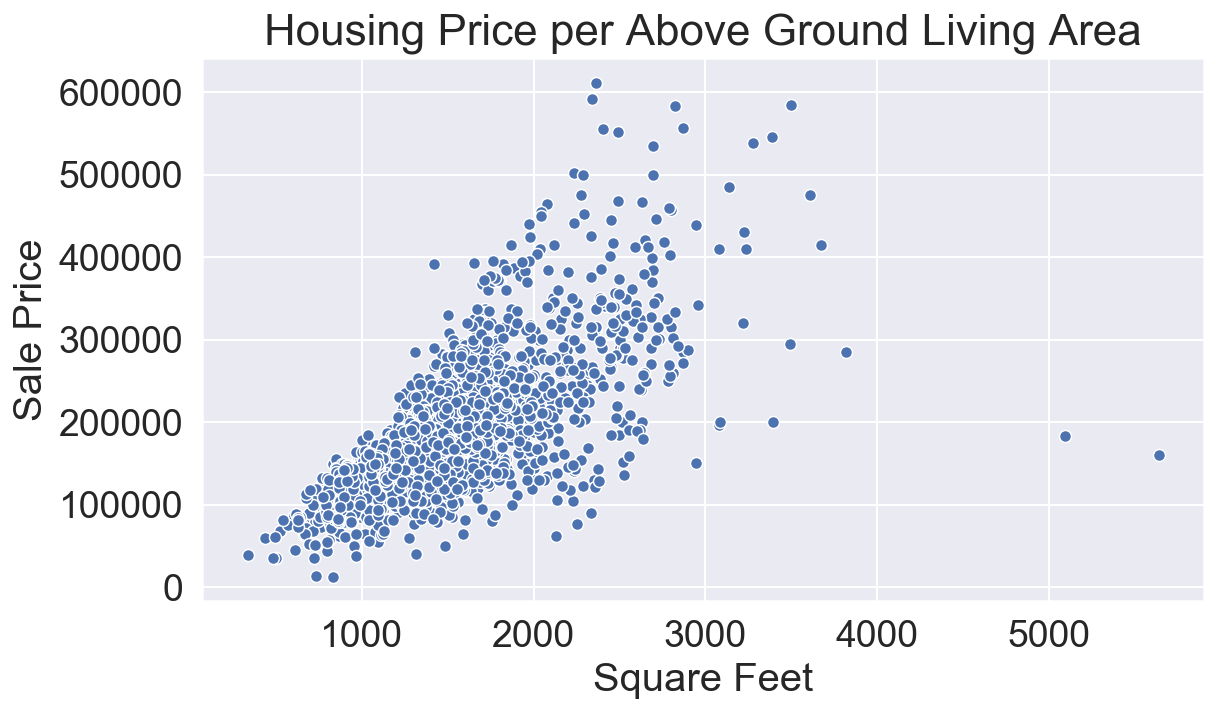

In [24]:
# Plotting Sale Price vs Above Ground Living Area
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df_train['Gr Liv Area'], y = df_train['SalePrice'])
plt.title('Housing Price per Above Ground Living Area', size = 22)
plt.xlabel('Square Feet', size = 20)
plt.ylabel('Sale Price', size = 20);

In [25]:
# Finding these IDs we will remove these at outliers
df_train[df_train['Gr Liv Area'] > 4000]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
1499  908154235           60        RL         313.0     63887   Pave   NaN   
2181  908154195           20        RL         128.0     39290   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
Id                                     ...                                  
1499       IR3          Bnk    AllPub  ...            0       480      Gd   
2181       IR1          Bnk    AllPub  ...            0         0     NaN   

     Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                       
1499   NaN          NaN        0       1     2008        New     160000  
2181   NaN         Elev    17000      10     2007        New     183850  

[2 rows x 80 columns]

#### 3. Garage Area

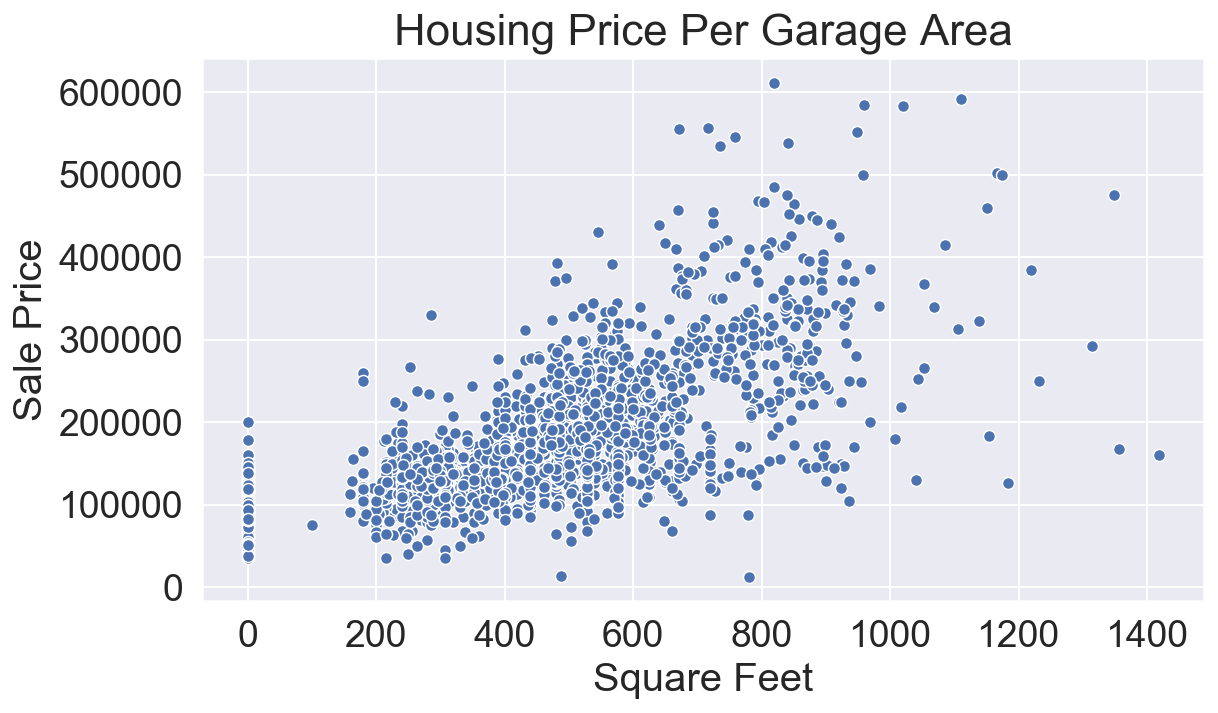

In [26]:
# Plotting Sale Price vs Garage Area
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df_train['Garage Area'], y = df_train['SalePrice'])
plt.title('Housing Price Per Garage Area', size = 22)
plt.xlabel('Square Feet', size = 20)
plt.ylabel('Sale Price', size = 20);

#### 4. Number of Garage Cars
#### Interestingly the mean sale price decreases above 3

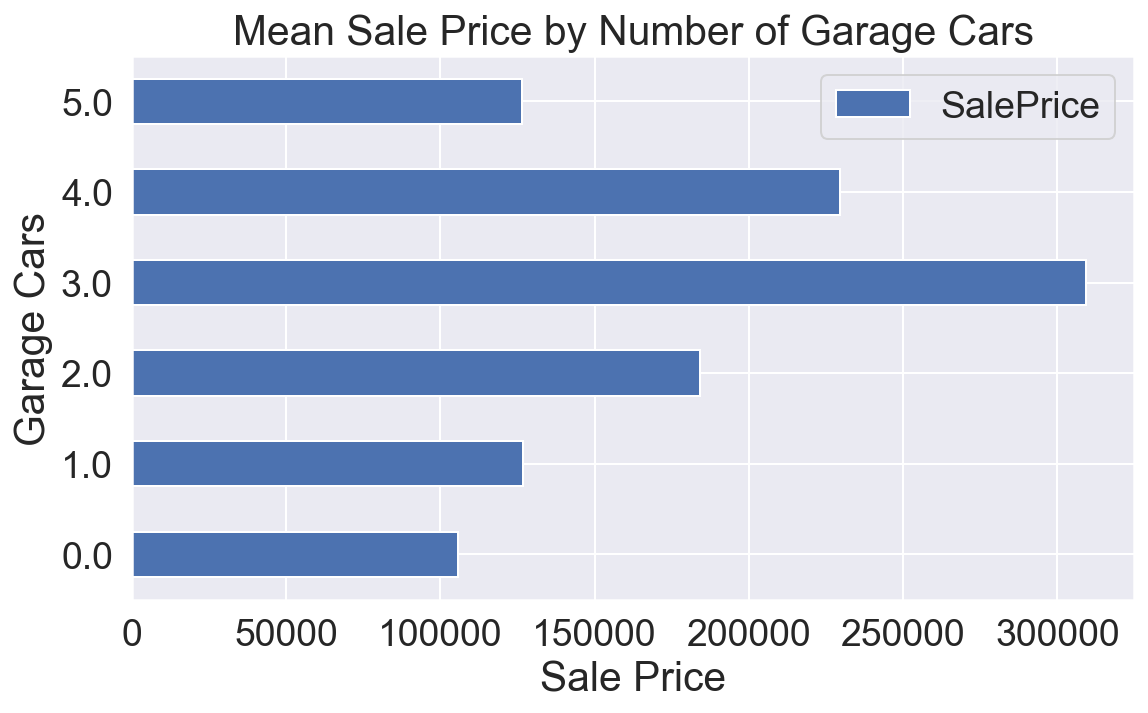

In [27]:
# Plotting mean sale prices per garage car amount. This suggests we will set these as categories.
df_train.groupby(['Garage Cars'])[['SalePrice']].mean().plot(kind = 'barh', figsize = (8, 5))
plt.title('Mean Sale Price by Number of Garage Cars')
plt.xlabel('Sale Price');

#### 5. Total Basement Square Feet

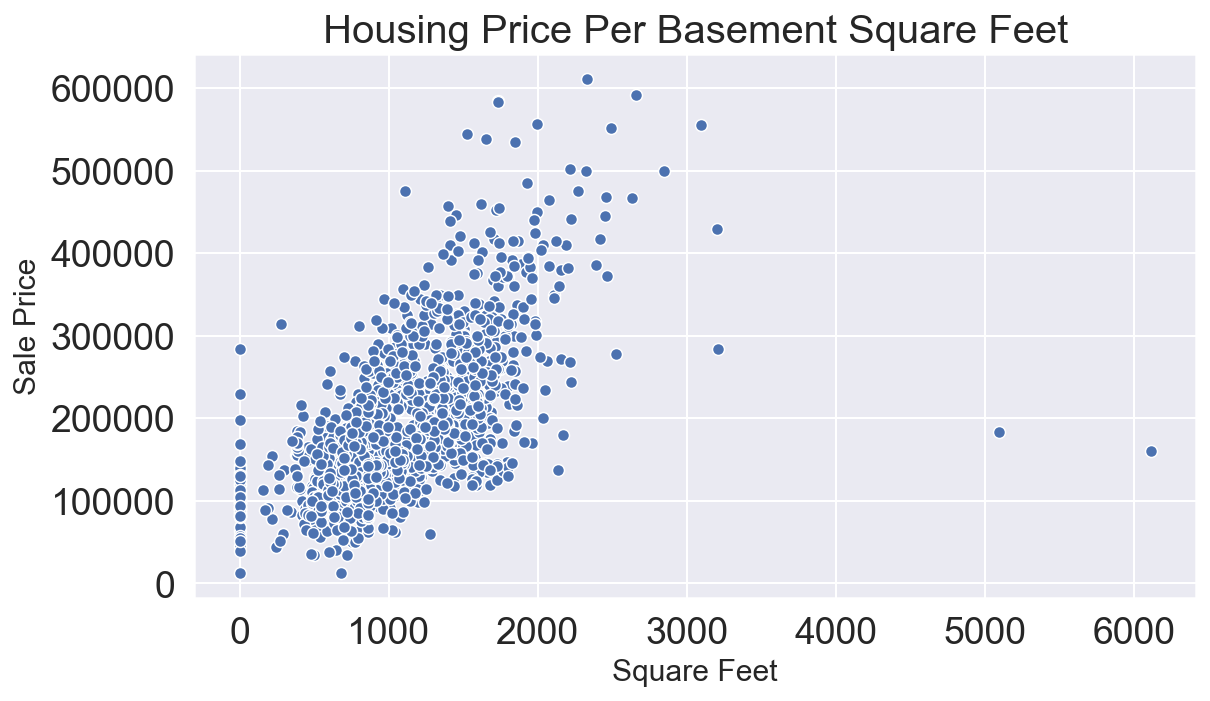

In [28]:
# Plotting Sale Price vs Total Basement Square Feet
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df_train['Total Bsmt SF'], y = df_train['SalePrice'])
plt.title('Housing Price Per Basement Square Feet', size = 20)
plt.xlabel('Square Feet', size = 15)
plt.ylabel('Sale Price', size = 15);

In [29]:
# Finding these IDs, they are the 2 identified earlier
df_train[df_train['Total Bsmt SF'] > 4000]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
1499  908154235           60        RL         313.0     63887   Pave   NaN   
2181  908154195           20        RL         128.0     39290   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
Id                                     ...                                  
1499       IR3          Bnk    AllPub  ...            0       480      Gd   
2181       IR1          Bnk    AllPub  ...            0         0     NaN   

     Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
Id                                                                       
1499   NaN          NaN        0       1     2008        New     160000  
2181   NaN         Elev    17000      10     2007        New     183850  

[2 rows x 80 columns]

#### Understanding materials

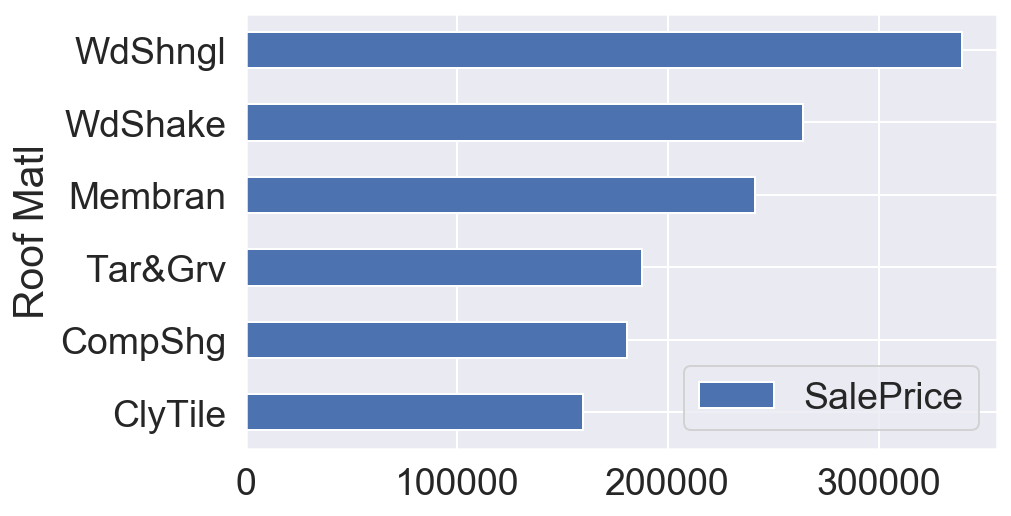

In [30]:
df_train.groupby(['Roof Matl'])[['SalePrice']].mean().sort_values(by = 'SalePrice', ascending = True).plot(kind = 'barh');


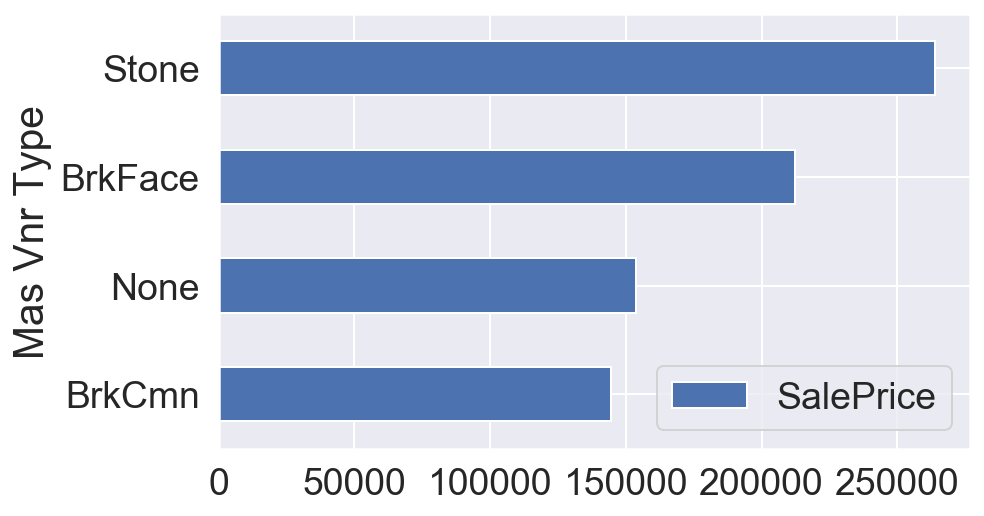

In [31]:
df_train.groupby(['Mas Vnr Type'])[['SalePrice']].mean().sort_values(by = 'SalePrice', ascending = True).plot(kind = 'barh');

### Handling Outliers

In [32]:
# We are removing the 4 outliers idendified during EDA
df_train.drop([2181, 1499, 1554, 182], inplace = True)

# these are additional outliers we have identified throgh multiple tests
df_train.drop([1183, 1783, 1641], inplace = True)

## Data Cleaning

### Converting Ordinal Features to Numbers

In [33]:
# We need to convert the Ordinal string data into numbers to feed into our linear regression model
# Data dictionary provided in this project reveals the ranking system in English. We have interpretted these to numbers. 

rating_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, np.nan : 0, 'NA': 0}
bsmt_expo_dict = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0, 'NA': 0}
bsmt_fin_dict = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
electrical_dict = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, np.nan: 0, 'NA': 0}
fence_dict = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0, 'NA': 0}
functional_dict = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal':1, np.nan: 0, 'NA': 0}
garage_finish_dict = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
land_slope_dict = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 0, 'NA': 0}
lot_shape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 0, 'NA': 0}
paved_drive_dict = {'Y': 3, 'P': 2, 'N': 1, np.nan: 0, 'NA': 0}
pool_qc_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0, 'NA': 0}
utilities_dict = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, np.nan: 0, 'NA': 0}

In [34]:
# Converting ordinal features from TRAINING data into numbers
df_train['Bsmt Cond'].replace(rating_dict, inplace = True)
df_train['Bsmt Qual'].replace(rating_dict, inplace = True)
df_train['Exter Cond'].replace(rating_dict, inplace = True)
df_train['Exter Qual'].replace(rating_dict, inplace = True)
df_train['Fireplace Qu'].replace(rating_dict, inplace = True)
df_train['Garage Cond'].replace(rating_dict, inplace = True) 
df_train['Garage Qual'].replace(rating_dict, inplace = True)
df_train['Heating QC'].replace(rating_dict, inplace = True)
df_train['Kitchen Qual'].replace(rating_dict, inplace = True)
df_train['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_train['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_train['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_train['Electrical'].replace(electrical_dict, inplace = True)
df_train['Fence'].replace(fence_dict, inplace = True)
df_train['Functional'].replace(functional_dict, inplace = True)
df_train['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_train['Land Slope'].replace(land_slope_dict, inplace = True)
df_train['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_train['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_train['Pool QC'].replace(pool_qc_dict, inplace = True)
df_train['Utilities'].replace(utilities_dict, inplace = True)

In [35]:
# Converting ordinal features from TESTING data into numbers
df_test['Bsmt Cond'].replace(rating_dict, inplace = True)
df_test['Bsmt Qual'].replace(rating_dict, inplace = True)
df_test['Exter Cond'].replace(rating_dict, inplace = True)
df_test['Exter Qual'].replace(rating_dict, inplace = True)
df_test['Fireplace Qu'].replace(rating_dict, inplace = True)
df_test['Garage Cond'].replace(rating_dict, inplace = True) 
df_test['Garage Qual'].replace(rating_dict, inplace = True)
df_test['Heating QC'].replace(rating_dict, inplace = True)
df_test['Kitchen Qual'].replace(rating_dict, inplace = True)
df_test['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_test['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_test['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_test['Electrical'].replace(electrical_dict, inplace = True)
df_test['Fence'].replace(fence_dict, inplace = True)
df_test['Functional'].replace(functional_dict, inplace = True)
df_test['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_test['Land Slope'].replace(land_slope_dict, inplace = True)
df_test['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_test['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_test['Pool QC'].replace(pool_qc_dict, inplace = True)
df_test['Utilities'].replace(utilities_dict, inplace = True)

### Inputting Missing Values: Nominal

In [36]:
# creating dictionary to replace null nominal values
nominal_dict = {np.nan:'None'}

In [37]:
# Replacing nominal null features in Train data
df_train['Garage Type'].replace(nominal_dict, inplace = True)
df_train['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_train['Misc Feature'].replace(nominal_dict, inplace = True)
df_train['Alley'].replace(nominal_dict, inplace = True)

In [38]:
# Test Data
df_test['Garage Type'].replace(nominal_dict, inplace = True)
df_test['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_test['Misc Feature'].replace(nominal_dict, inplace = True)
df_test['Alley'].replace(nominal_dict, inplace = True)

### Inputting Missing Values: Continuous

In [39]:
# Continuous features will be replaced with the mean values of those features.
lot_frontage_dict = {np.nan: df_train['Lot Frontage'].mean()}
mas_vnr_area_dict = {np.nan: df_train['Mas Vnr Area'].mean()}
bsmtFin_SF_2_dict = {np.nan: df_train['BsmtFin SF 2'].mean()}
garage_area_dict = {np.nan: df_train['Garage Area'].mean()}
bmst_unf_sf_dict = {np.nan: df_train['Bsmt Unf SF'].mean()}
total_bsmt_sf_dict = {np.nan: df_train['Total Bsmt SF'].mean()}
bmst_fin_sf_1_dict = {np.nan: df_train['BsmtFin SF 1'].mean()}

In [40]:
# Replacing null continuous features train
df_train['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_train['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_train['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_train['Garage Area'].replace(garage_area_dict, inplace = True)
df_train['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_train['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_train['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

In [41]:
# Replacing null continuous features test
df_test['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_test['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_test['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_test['Garage Area'].replace(garage_area_dict, inplace = True)
df_test['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_test['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_test['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

### Inputting Missing Values: Discrete

In [42]:
df_train['Bsmt Half Bath'].median()

0.0

In [43]:
df_train['Bsmt Full Bath'].median()

0.0

In [44]:
# Discrete features will be replaced with the median values
garage_yr_blt_dict = {np.nan: df_train['Garage Yr Blt'].median()}
bsmt_full_bath_dict = {np.nan: 0.0}
bsmt_half_bath_dict = {np.nan: 0.0}
garage_cars_dict = {np.nan: df_train['Garage Cars'].median()}

In [45]:
# Replacing null values in Train 
df_train['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_train['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_train['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_train['Garage Cars'].replace(garage_cars_dict, inplace = True)

In [46]:
# Replacing null values in Test
df_test['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_test['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_test['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_test['Garage Cars'].replace(garage_cars_dict, inplace = True)

In [47]:
# Setting these to int
df_train['Bsmt Full Bath'] = df_train['Bsmt Full Bath'].astype('float64')
df_train['Bsmt Half Bath'] = df_train['Bsmt Half Bath'].astype('float64')

In [48]:
# checking remaining null values in the TRAINING data
df_train.isnull().sum().sort_values(ascending = False).head(2)

SalePrice    0
Sale Type    0
dtype: int64

In [49]:
# checking remaining null values in the TESTING data
df_test.isnull().sum().sort_values(ascending = False).head(2)

Sale Type     0
Exter Cond    0
dtype: int64

## Feature Engineering

In [50]:
# Removing PID column, since that is a unique identifier
df_train.drop(columns = 'PID', inplace = True)
df_test.drop(columns = 'PID', inplace = True)

In [51]:
# Categorizing the features
nominal_features = ['MS SubClass', 'MS Zoning', 'Street', 'Misc Feature', 'Land Contour', 'Lot Config', 'Neighborhood', 
                    'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                    'Exterior 2nd', 'Alley', 'Foundation', 'Garage Type', 'Heating', 'Central Air', 'Mas Vnr Type', 
                    'Sale Type']

discrete_features = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                     'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 
                     'Mo Sold', 'Yr Sold']

continuous_features = ['Lot Area', 'Lot Frontage', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 
                       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Wood Deck SF', 'Open Porch SF',
                       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Total Bsmt SF', 'Garage Area', 
                       'Misc Val']

ordinal_features = ['Pool QC', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Fence', 
                    'Exter Qual', 'Exter Cond', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 
                    'Bsmt Exposure', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Bsmt Qual', 'Bsmt Cond', 
                    'Kitchen Qual', 'Functional', 'BsmtFin Type 1', 'Paved Drive']

### Dummy Variable Creation

In [52]:
# Getting Dummies for categorizationss
# TRAIN
df_train = pd.get_dummies(data = df_train, columns = nominal_features)
df_train = pd.get_dummies(data = df_train, columns = discrete_features)

# TEST
df_test = pd.get_dummies(data = df_test, columns = nominal_features)
df_test = pd.get_dummies(data = df_test, columns = discrete_features)

In [53]:
df_train.columns

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities', 'Land Slope',
       'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond',
       ...
       'Mo Sold_8', 'Mo Sold_9', 'Mo Sold_10', 'Mo Sold_11', 'Mo Sold_12',
       'Yr Sold_2006', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009',
       'Yr Sold_2010'],
      dtype='object', length=559)

### Interaction Variable Creation

In [54]:
# function that creates interaction features with other features in that category
def interactor(interaction_feature):
    for first_feat in interaction_feature:
        counter  = (interaction_feature.index(first_feat) + 1)
        for number in range(counter, len(interaction_feature)):
            string = first_feat + ' * ' + interaction_feature[number]
            # Interact Train data
            df_train[string] = df_train[first_feat] * df_train[interaction_feature[number]]
            # same for Test
            df_test[string] = df_test[first_feat] * df_test[interaction_feature[number]]

In [55]:
# creating interaction columns for Continuous, Ordinal Features
interactor(continuous_features)
interactor(ordinal_features)

### Ensuring Consistent Columns for Both Dataframes

In [56]:
# provides the columns that exist in Train that do NOT exist in Test (and vice versa0)
add_columns_to_train = set(df_test.columns) - set(df_train.columns)
add_columns_to_test = set(df_train.columns) - set(df_test.columns)

# Add columns that were exclusive to test.csv to df_train (and vice versa)
for col in add_columns_to_train:
    df_train[col] = 0
for col in add_columns_to_test:
    df_test[col] = 0

# Reorder df_train to match df_test columns
df_train = df_train[df_test.columns]

# Removing SalePrice from Test
df_test = df_test.drop('SalePrice', axis = 1)

In [57]:
# drops first column of the group of dummy columns 
for nom in nominal_features:
    dummy_list = [col for col in df_train.columns if nom in col]
    df_train.drop(columns = dummy_list[0], inplace = True)
    df_test.drop(columns = dummy_list[0], inplace = True)

In [58]:
# drops first column of the group of dummy columns 
for nom in discrete_features:
    dummy_list = [col for col in df_train.columns if nom in col]
    df_train.drop(columns = dummy_list[0], inplace = True)
    df_test.drop(columns = dummy_list[0], inplace = True)

In [59]:
# checking the difference in columns
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [60]:
# checking the difference in columns
set(df_test.columns) - set(df_train.columns)

set()

In [61]:
# checking data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 109 to 10
Columns: 973 entries, Lot Frontage to Condition 2_RRAn
dtypes: float64(112), int64(105), object(272), uint8(484)
memory usage: 8.6+ MB


In [62]:
# converting the object data types into float64 for both test and training data so we can run regressions
df_train = df_train.astype('float64')
df_test = df_test.astype('float64')

In [63]:
# confirming they are the same data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 109 to 10
Columns: 973 entries, Lot Frontage to Condition 2_RRAn
dtypes: float64(973)
memory usage: 15.2 MB


In [64]:
df_train.shape

(2044, 973)

In [65]:
df_test.shape

(878, 972)

In [66]:
# Dropping the 1st column in dummied nominal feature columns
# Train
for col in df_train.columns:
    for nom in nominal_features:
        if nom in col:
            df_train.drop(columns = col, inplace = True)
# Test    
for col in df_test.columns:
    for nom in nominal_features:
        if nom in col:
            df_test.drop(columns = col, inplace = True)

In [67]:
# Dropping the 1st column in dummied nominal feature columns
# Train
for col in df_train.columns:
    for nom in nominal_features:
        if nom in col:
            df_train.drop(columns = col, inplace = True)
# Test    
for col in df_test.columns:
    for nom in nominal_features:
        if nom in col:
            df_test.drop(columns = col, inplace = True)

### Reviewing Correlations

In [68]:
# finding correlation values
pd.set_option('display.max_rows',785)
df_train.corr()[['SalePrice']].sort_values('SalePrice')

SalePrice
Full Bath_1                     -0.519906
Garage Cars_1.0                 -0.406622
Lot Shape                       -0.297665
Lot Shape * Utilities           -0.294621
Bsmt Full Bath_0.0              -0.281006
...                                   ...
Garage Cars_4                         NaN
Low Qual Fin SF * Mas Vnr Area        NaN
Low Qual Fin SF * Pool Area           NaN
3Ssn Porch * Screen Porch             NaN
3Ssn Porch * Pool Area                NaN

[790 rows x 1 columns]

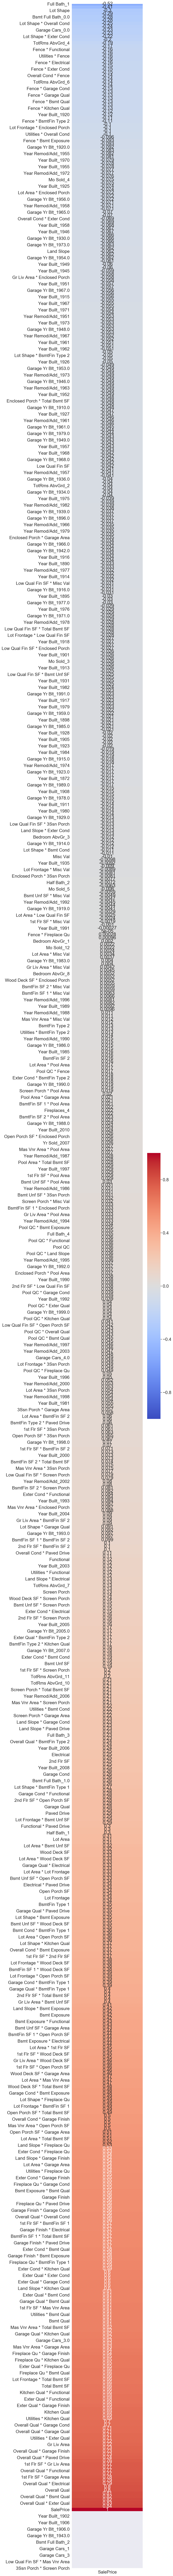

In [69]:
# Heatmaps of updated feature list
plt.figure(figsize = (6, 200)) # this figsizes are in inches wide and tall
# need to specify which column you want to sort by, even though there is only 1 column
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'),
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1,
            annot=True);

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 109 to 10
Columns: 790 entries, Lot Frontage to Garage Yr Blt_1895.0
dtypes: float64(790)
memory usage: 12.3 MB


## Preprocessing

In [71]:
# setting X and y variables
X = df_train.drop(columns = 'SalePrice')
y = df_train['SalePrice']

In [72]:
#OLS on a test
X_ols = sm.add_constant(X)
est = sm.OLS(y, X.astype(float)).fit()
est.summary()

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     54.77
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:58:00   Log-Likelihood:                -22529.
No. Observations:                2044   AIC:                         4.643e+04
Df Residuals:                    1360   BIC:                         5.027e+04
Df Model:                         683                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Lot Frontage                       185.0516    134.396      1.377      0.169     -78.593     448.697
Lot Area                             1.9351      0.749      2.585      0.010       0.466       3.404
Lot Shape                        -9923.6693   9330.607     -1.064      0.288   -2.82e+04    8380.274
Utilities                          1.66e+04   6.04e+04      0.275      0.784   -1.02e+05    1.35e+05
Land Slope                       -7119.1776   7952.841     -0.895      0.371   -2.27e+04    8481.988
Overall Qual                      4404.8369   4911.304      0.897      0.370   -5229.717     1.4e+04
Overall Cond                     -3582.8449   5191.025     -0.690      0.490   -1.38e+04    6600.441
Mas Vnr Area                       -14.5543     13.983     -1.041      0.298     -41.986      12.877
Exter Qual                       -3220.2037   4406.202     -0.731      0.465   -1.19e+04    5423.487
Exter Cond                       -3186.9878   4110.760     -0.775      0.438   -1.13e+04    4877.130
Bsmt Qual                         2264.1037   5395.495      0.420      0.675   -8320.293    1.28e+04
Bsmt Cond                         8441.8286   6073.524      1.390      0.165   -3472.664    2.04e+04
Bsmt Exposure                      429.1661   2000.057      0.215      0.830   -3494.366    4352.698
BsmtFin Type 1                    1.372e+04   1.03e+04      1.326      0.185   -6579.481     3.4e+04
BsmtFin SF 1                        -6.8943      7.739     -0.891      0.373     -22.076       8.287
BsmtFin Type 2                    6663.1633   5339.970      1.248      0.212   -3812.309    1.71e+04
BsmtFin SF 2                       -10.1319     15.269     -0.664      0.507     -40.085      19.822
Bsmt Unf SF                         -0.8018      6.803     -0.118      0.906     -14.148      12.544
Total Bsmt SF                      -17.8462     10.167     -1.755      0.079     -37.791       2.099
Electrical                       -9910.5966   9071.949     -1.092      0.275   -2.77e+04    7885.934
1st Flr SF                          40.8634     33.977      1.203      0.229     -25.790     107.517
2nd Flr SF                          19.1644     33.406      0.574      0.566     -46.368      84.697
Low Qual Fin SF                    -67.7470     98.586     -0.687      0.492    -261.145     125.651
Gr Liv Area                         -7.7278     34.111     -0.227      0.821     -74.644      59.188
Kitchen Qual                     -4711.1718   5071.699     -0.929      0.353   -1.47e+04    5238.030
Functional                       -1.533e+04   1.21e+04     -1.269      0.205    -3.9e+04    8360.199
Fireplace Qu                      9397.0209   6855.058      1.371      0.171   -4050.613    2.28e+04
Garage Finish                     1541.1910   2412.18

In [73]:
# running Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [74]:
# Instantiate Standard Scaler.
sc = StandardScaler()

# Fit AND transform Standard Scaler to data in one step.
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [75]:
# Log Versions
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [76]:
# plot predictions function
def plot_predictions(predictions, regression_type):

    # plotting training data for Y hat vs actual Y
    plt.figure(figsize=(10,5))

    # Generate a scatterplot of carat versus price.
    plt.scatter(predictions,
                y_train,
                alpha = 0.5)

    plt.xlabel('Predicted Sale Price', fontsize = 15)
    plt.ylabel('Actual Sale Price', fontsize = 15)
    plt.title("Predicting Housing Prices with "+regression_type , fontsize = 24)

    # if we want to see each plot value
#     training = 0
#     for i, txt in y_train.iteritems():
#         plt.annotate(i, (predictions[training], y_train[i]))
#         training += 1

    # plot the regression line
    plt.plot(predictions,
             predictions,
             color = 'red');
    return

## Modeling

### Linear Regression

In [77]:
# instantiating and Fitting a linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# creating a dictionary of coefficients per column
lr_coef_df = pd.DataFrame({
    'Features':X.columns,
    'Coef': lr.coef_,
    'Abs_Coef': np.abs(lr.coef_)
})

#### Each incremental change in the feature amount affects the Sale Price in dollars by the coefficient value

In [79]:
# interpretable coefficients as $ value changes to sale price
lr_coef_df.sort_values(by = 'Abs_Coef', ascending = False)

Features           Coef       Abs_Coef
44        Year Built_1892  536714.862688  536714.862688
145       Year Built_2010 -158073.958049  158073.958049
768       Year Built_1901  119687.834694  119687.834694
141       Year Built_2006  109725.876211  109725.876211
81        Year Built_1946  102956.315564  102956.315564
..                    ...            ...            ...
751      TotRms AbvGrd_14       0.000000       0.000000
769       Year Built_1872       0.000000       0.000000
763       Bedroom AbvGr_8       0.000000       0.000000
756       Garage Cars_5.0       0.000000       0.000000
750  Garage Yr Blt_1933.0       0.000000       0.000000

[789 rows x 3 columns]

In [80]:
# refitting for the log version
lr.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# predicting values for linear regression
y_hat_lr_train = lr.predict(X_train)
y_hat_lr_test = lr.predict(X_test)

In [82]:
# reducing the data back down
preds_lr_train = np.exp(y_hat_lr_train)
preds_lr_test = np.exp(y_hat_lr_test)

In [83]:
print(lr.score(X_train, preds_lr_train))

-5.566341796052067


In [84]:
# this is the 5 fold cross val score
cross_val_score(lr, X_train, y_train_log, cv=5).mean()

-10.085658520215715

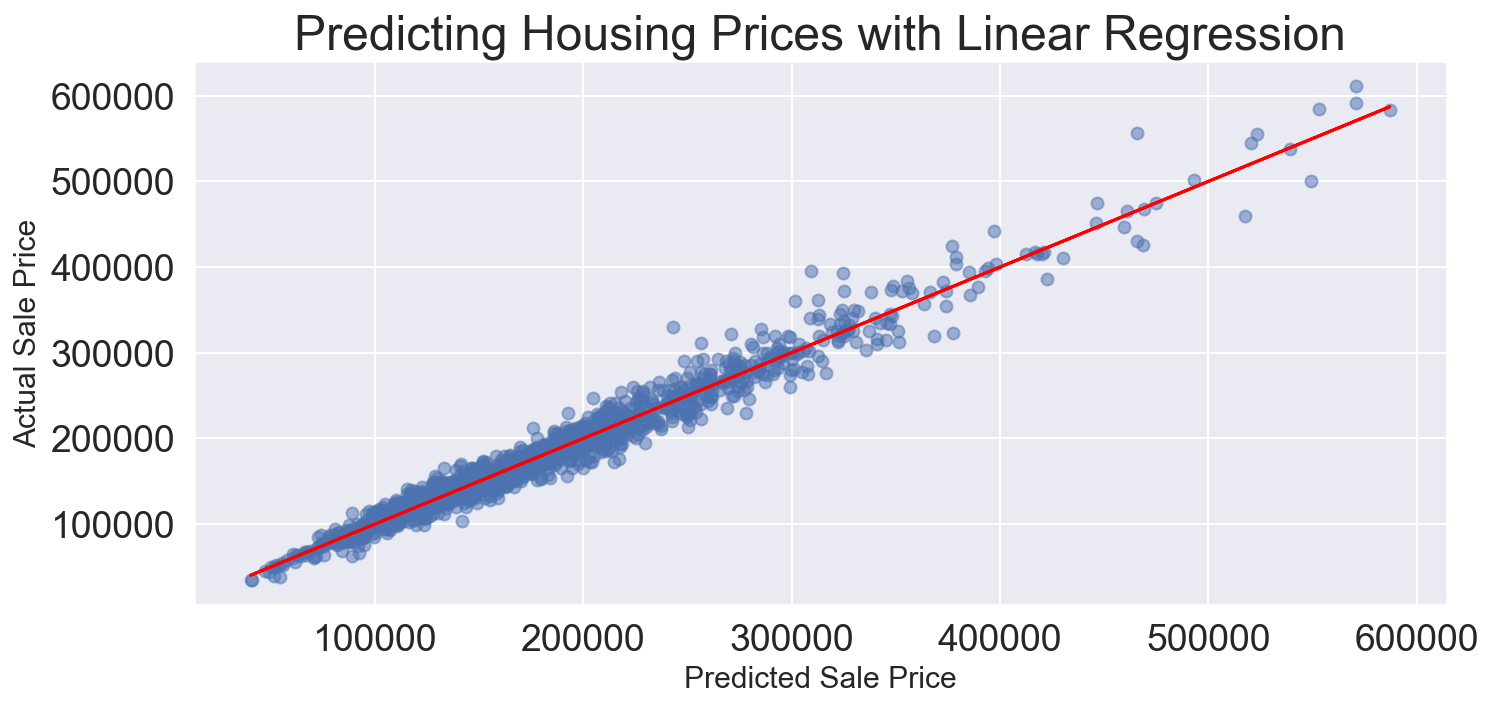

In [85]:
plot_predictions(preds_lr_train, 'Linear Regression')

In [86]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_lr_train))

13614.625572449924

In [87]:
# Mean Squared Errors for Y test
np.sqrt(mean_squared_error(y_test, preds_lr_test))

74074.0652099278

In [88]:
lr.score(X_train, y_train_log)

0.9675121479421791

In [89]:
lr.score(X_test, y_test_log)

-0.15923964497381204

### Ridge Regression ###

In [90]:
# Set up a list of ridge alphas to check.
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
ridge_alphas = np.linspace(500, 1000, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5) #How many folds

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train_log) # or y_train log 

RidgeCV(alphas=array([ 500.        ,  505.05050505,  510.1010101 ,  515.15151515,
        520.2020202 ,  525.25252525,  530.3030303 ,  535.35353535,
        540.4040404 ,  545.45454545,  550.50505051,  555.55555556,
        560.60606061,  565.65656566,  570.70707071,  575.75757576,
        580.80808081,  585.85858586,  590.90909091,  595.95959596,
        601.01010101,  606.06060606,  611.11111111,  616.16161616,
        621.21212121,  626.26262626,  63...
        883.83838384,  888.88888889,  893.93939394,  898.98989899,
        904.04040404,  909.09090909,  914.14141414,  919.19191919,
        924.24242424,  929.29292929,  934.34343434,  939.39393939,
        944.44444444,  949.49494949,  954.54545455,  959.5959596 ,
        964.64646465,  969.6969697 ,  974.74747475,  979.7979798 ,
        984.84848485,  989.8989899 ,  994.94949495, 1000.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [91]:
# Optimal Alpha
ridge_cv.alpha_

893.939393939394

In [92]:
print(ridge_cv.score(Z_train, y_train_log))
print(ridge_cv.score(Z_test, y_test_log))

0.9305607832917203
0.914592714339168


In [93]:
# fitting
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(Z_train, y_train_log) # or y_train_log

Ridge(alpha=893.939393939394, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [94]:
# predicting values with Ridge
y_hat_ridge_train = ridge.predict(Z_train) # these are log versions
y_hat_ridge_test = ridge.predict(Z_test)

In [95]:
# Final Ridge predictions
preds_ridge_train = np.exp(y_hat_ridge_train)
preds_ridge_test = np.exp(y_hat_ridge_test)

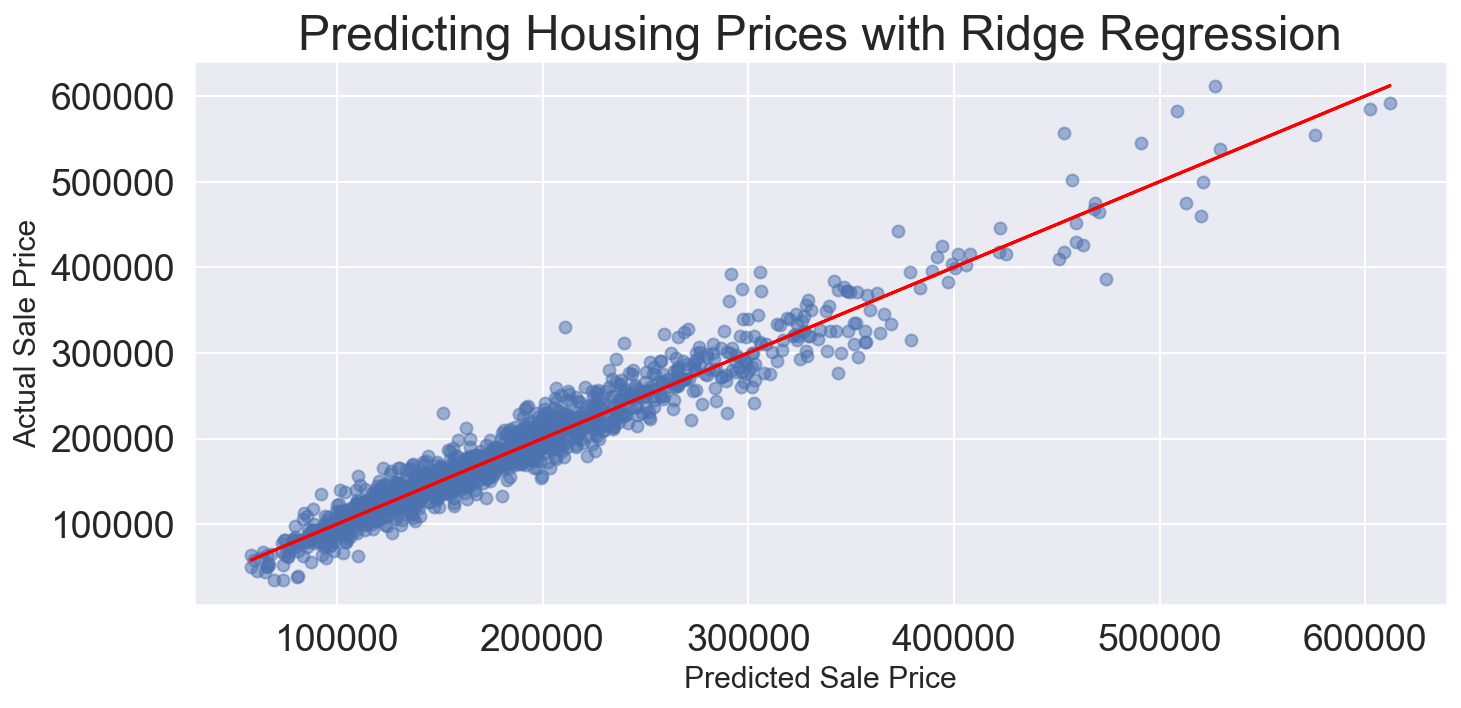

In [96]:
plot_predictions(preds_ridge_train, 'Ridge Regression')

In [97]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_ridge_train))

18078.784877573886

In [98]:
# test data linear regression RMSE
np.sqrt(mean_squared_error(y_test, preds_ridge_test)) # keep updating y_test values here for the models

21281.872577456295

### LASSO Regression

In [99]:
# Set up a list of Lasso alphas to check.
lasso_alphas = np.linspace(0.001, 0.005, 100)

# Cross-validate over our list of Lasso alphas.
lasso = LassoCV(
    alphas = lasso_alphas,
    cv = 5,
    max_iter = 5000)

# Fit model using best ridge alpha!
lasso.fit(Z_train, y_train_log)

LassoCV(alphas=array([0.001     , 0.0010404 , 0.00108081, 0.00112121, 0.00116162,
       0.00120202, 0.00124242, 0.00128283, 0.00132323, 0.00136364,
       0.00140404, 0.00144444, 0.00148485, 0.00152525, 0.00156566,
       0.00160606, 0.00164646, 0.00168687, 0.00172727, 0.00176768,
       0.00180808, 0.00184848, 0.00188889, 0.00192929, 0.0019697 ,
       0.0020101 , 0.00205051, 0.00209091, 0.00213131, 0.00217172,
       0.0022...
       0.00443434, 0.00447475, 0.00451515, 0.00455556, 0.00459596,
       0.00463636, 0.00467677, 0.00471717, 0.00475758, 0.00479798,
       0.00483838, 0.00487879, 0.00491919, 0.0049596 , 0.005     ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [100]:
lasso.alpha_

0.0033434343434343436

In [101]:
print(lasso.score(Z_train, y_train_log))
print(lasso.score(Z_test, y_test_log))

0.9280551711388924
0.9236441729915493


In [102]:
# predicting logged values with Ridge
y_hat_lasso_train = lasso.predict(Z_train)
y_hat_lasso_test = lasso.predict(Z_test)

In [103]:
# Final Ridge predictions
preds_lasso_train = np.exp(y_hat_lasso_train)
preds_lasso_test = np.exp(y_hat_lasso_test)

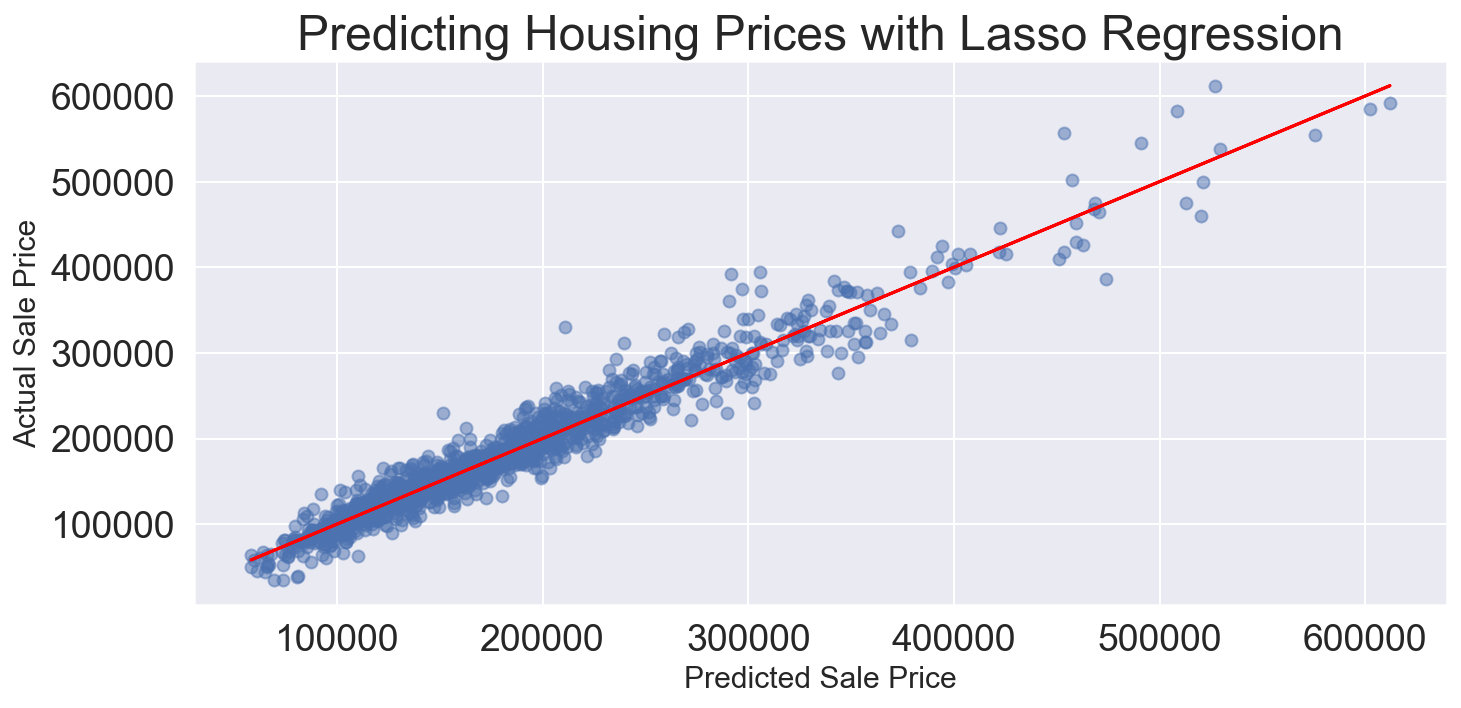

In [104]:
plot_predictions(preds_ridge_train, 'Lasso Regression')

In [105]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_lasso_train))

18118.758476235573

In [106]:
# test data linear regression RMSE
np.sqrt(mean_squared_error(y_test, preds_lasso_test))

20088.49479714532

In [107]:
lasso_coef_df = pd.DataFrame({
    'Features':X.columns,
    'coef': lasso.coef_,
    'abs_coef': np.abs(lasso.coef_)
})

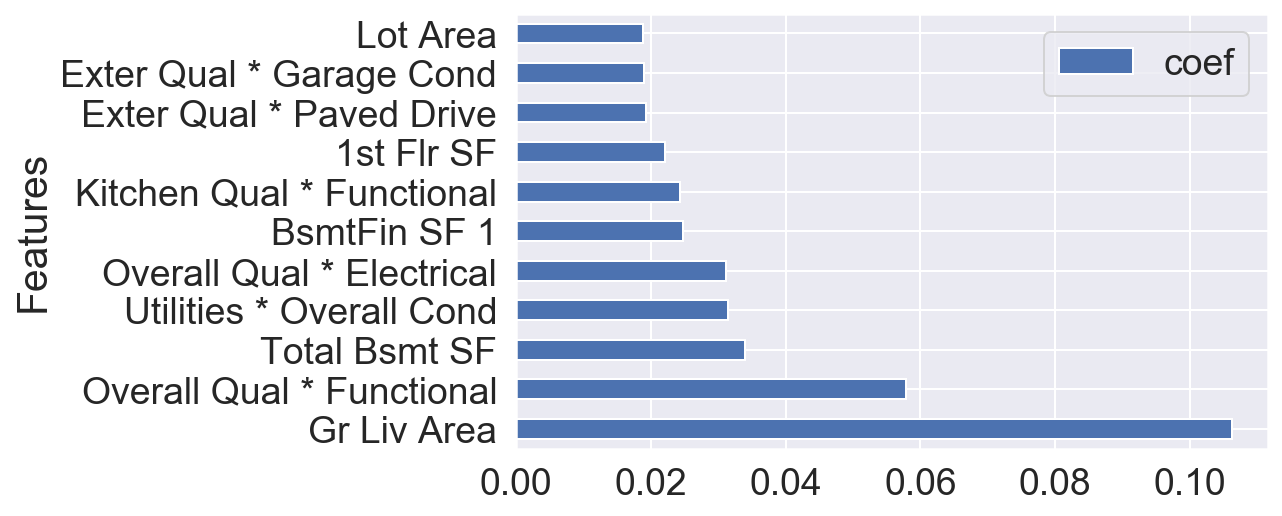

In [108]:
lasso_coef_df[lasso_coef_df['abs_coef'] > 0.018].sort_values(by = 'abs_coef', ascending = False).set_index('Features')[['coef']].plot(kind = 'barh');

### Elastic Net Regression

In [109]:
# Create the hyperparameter grid (THINK: how many different hyperparameter combinations are there?)
# Hyperparameters for Elastic Net: (1) Alpha, 2 L1_ratio (rho)
hyperparams = {'alpha': [0.001, 0.005, 0.01, 0.03, 0.05, 0.2], # originally 0.01, 0.1, 10, 100
              'l1_ratio': [0.15, 0.2, 0.25, 0.27,0.29, 0.3,0.31, 0.33, 0.35, 0.4, 0.5, 0.7, 1]} # 0, 0.2, 0.5, 0.7, 1

# Instantiated the GridSearch on a Elastic Net model
enet_gs = GridSearchCV(estimator = ElasticNet(), # estimator is the parent model object
                      param_grid = hyperparams,
                      cv = 5) # param_grid is the test cases for hyperparams
enet_gs.fit(Z_train, y_train_log)


# Fit it to data!                (THINK: How many models are going to be fit?)

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1975345858483943, tolerance: 0.020068384830745935
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.400736934518501, tolerance: 0.019440686060205246
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4039580286942082, tolerance: 0.02006664620746349
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1890091150386253, tolerance: 0.020129340021851957
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6917460761286263, tolerance: 0.019665083265094727
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5470003828826897, tolerance: 0.020068384830745935
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_mod

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0841579245465045, tolerance: 0.019665083265094727
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.081789611328837, tolerance: 0.020068384830745935
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16229243483047107, tolerance: 0.019440686060205246
  positive)
C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_mod

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.03, 0.05, 0.2],
                         'l1_ratio': [0.15, 0.2, 0.25, 0.27, 0.29, 0.3, 0.31,
                                      0.33, 0.35, 0.4, 0.5, 0.7, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
# See what the best average CV score is
enet_gs.best_score_

0.9047237341301558

In [111]:
# See which combination of hyperparameters in the grid resulted in this best score
enet_gs.best_params_

{'alpha': 0.01, 'l1_ratio': 0.31}

In [112]:
# we can call this object and use it to predict. Let's call this object best_enet
best_enet = enet_gs.best_estimator_
enet_gs.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.31,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
# Use this to make predictions and score them
best_enet.score(Z_test, y_test_log)

0.9240988373979123

In [114]:
# predicting
enet_model_preds_train = enet_gs.predict(Z_train)
enet_model_preds = enet_gs.predict(Z_test)

# Evaluate model.
print(enet_gs.score(Z_train, y_train_log))
print(enet_gs.score(Z_test, y_test_log))

0.9292776361165302
0.9240988373979123


In [115]:
# Final Enet Predictions
preds_enet_train = np.exp(enet_model_preds_train)
preds_enet_test = np.exp(enet_model_preds)

In [116]:
# Root Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_enet_train))

17933.59326011265

In [117]:
# Root Mean Squared Errors for Y testing
np.sqrt(mean_squared_error(y_test, preds_enet_test))

20079.296204215094

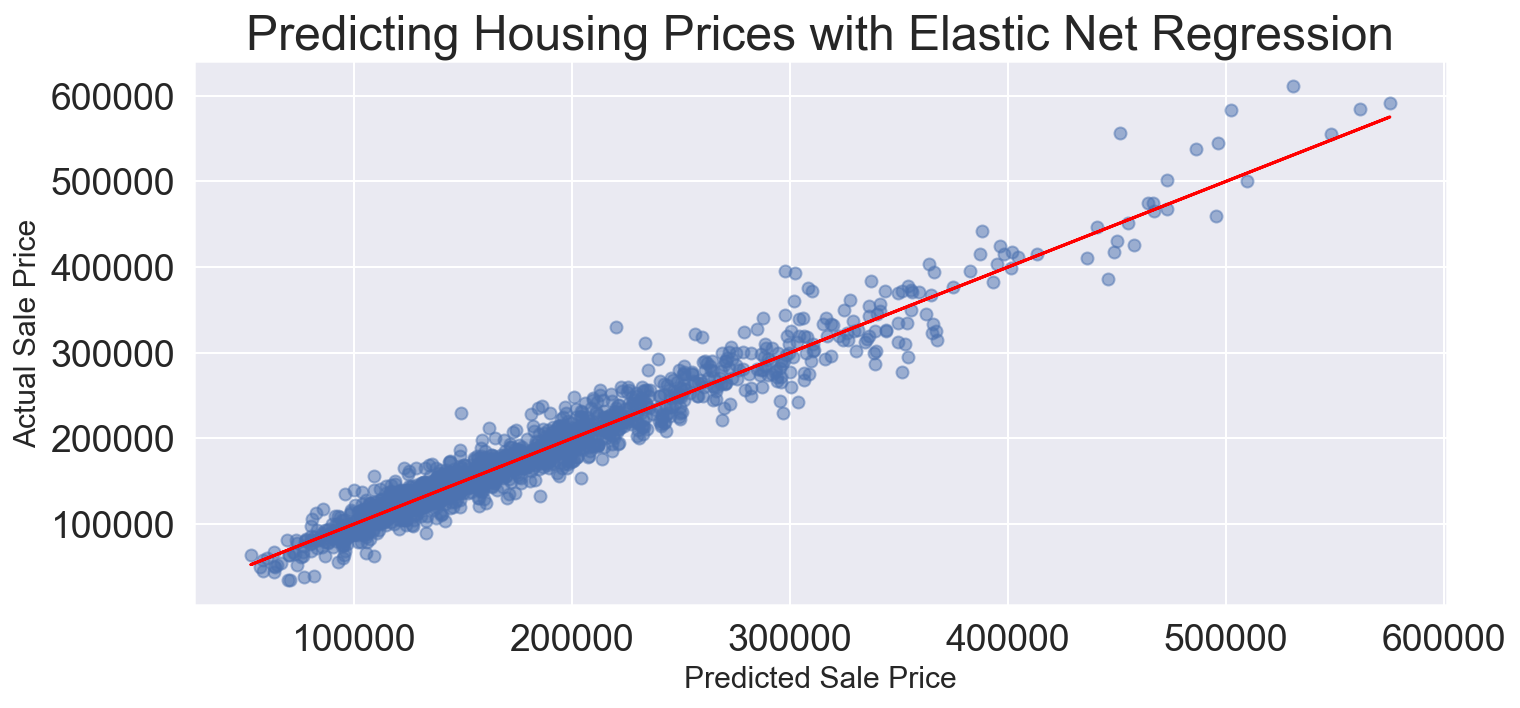

In [118]:
plot_predictions(preds_enet_train, 'Elastic Net Regression')

### Outputting Kaggle

In [119]:
X_kaggle = df_test

In [120]:
# Scaling data
X_kaggle_sc = sc.transform(X_kaggle)

In [121]:
# Enet Regression
preds_kaggle_log = enet_gs.predict(X_kaggle_sc)
X_kaggle['SalePrice'] = np.exp(preds_kaggle_log)

In [122]:
output = X_kaggle[['SalePrice']]

In [123]:
# Creating CSV file
output.to_csv('./datasets/EnetRegression_Ordinal_Continuous_Interactions_mean_7OutliersRemoved.csv')

## Conclusions and Evaluation

We have identified correlation values associated to each of the 78 features we analysed and have narrowed down to 5 that sellers should focus on achieve the highest sale prices: Overall Quality, Living Square Footage, Exterior Quality, Kitchen Quality, and Total Basement Square Footage. Improving or reducing the value of these features will directly affect the sales prices of homes. 

Linear model performed the worst in our tests. It obtained an R-squared of -15.92% and a root mean squared error of 74,074 USD. 
Ridge model did much better with an R-squared of 91.46% and a rood mean squared error of 21,281 USD.
LASSO model achieved an R-squared of 92.36% and a root mean squared error of 20,088 USD. 
Elastic net model outperformed the rest with an R-squared of 92.41% and a root mean squared error of 20,079 USD. 

After running simulations through Linear, Ridge, LASSO, and Elastic Net Regression, we have found Elastic Net Regression to be the most flexible. When we provide too much data, linear regression creates an overfit model that does well in training, but poorly on testing. Ridge regression keeps all features in the model, even if there is a poor correlation, but idenfities when to assign a low coefficient. LASSO regression, on the other hand, drops features it deems not helpful. Elastic Net Regression allows us to identify the optimal proportion of Ridge vs LASSO regression the best of both worlds. Unforunately, there will always be outliers that negatively affect our model, along with variances that cannot be explained by the data within our model, but the goal is build one that can generalize well. We have successully accurately predicted over 90% of the sales prices with our model.